In [1]:
abs(-10)

10

In [2]:
import numpy as np

In [3]:
price = [5000,7000,9000,12000,15000]
area = [100,150,200,250,300]

In [4]:
price_mean = np.mean(price)
area_mean = np.mean(area)

In [5]:
price_mean

9600.0

In [6]:
area_mean

200.0

In [7]:
numerator = np.sum((area-area_mean)*(price - price_mean))

In [8]:
denominator = np.sum(np.square(area-area_mean))

In [9]:
denominator

25000.0

In [10]:
numerator/denominator

50.0

In [11]:
import matplotlib.pyplot as plt

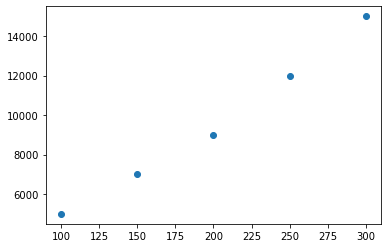

In [12]:
plt.scatter(area,price)
plt.show()

## linea regression example

1) Collect the dependent & independent variables 

2) Calculate the mean of each variables

3) Calculate the variance between the two variables

4) Calculate the covariance between 2 variables

5) Calculate the coefficient of linear regression equation:

    b1 = covariance(x,y) / variance(x)
    b0 = mean(y) - b1 * mean(x)
    
    
6) Use the coefficients to predict the value on the dependent variable

     y_predict = b0 + b1 * x

In [13]:
import numpy as np

x = np.array([1,2,3,4,5])

y = np.array([2,3,4,5,6])

In [14]:
x

array([1, 2, 3, 4, 5])

In [15]:
y

array([2, 3, 4, 5, 6])

In [17]:
avg_x = np.mean(x)

In [18]:
avg_y = np.mean(y)

In [19]:
avg_x

3.0

In [20]:
avg_y

4.0

In [21]:
# calculating the variance

x_var = np.var(x)
y_var = np.var(y)

In [22]:
x_var

2.0

In [24]:
y_var

2.0

1

In [29]:
cov = np.cov(x,y)[0][1]

In [30]:
cov

2.5

In [31]:
b1 = cov/ x_var

In [32]:
b1

1.25

In [33]:
b0 = avg_y - b1 * avg_x

In [34]:
b0

0.25

In [43]:
x_pred = 5

y_pred = b0+b1*x_pred

In [44]:
y_pred

6.5

In [45]:
import pandas as pd

In [46]:
data = pd.read_csv('linear_reg_sample.csv')

In [47]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [49]:
x = data['SAT']
y = data['GPA']

Text(0, 0.5, 'GPA')

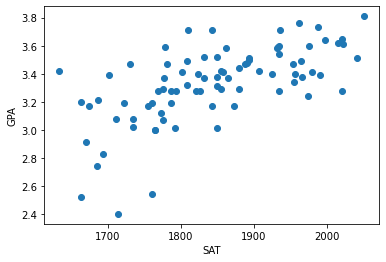

In [51]:
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

In [52]:
sat_mean = np.mean(data['SAT'])

In [53]:
sat_mean

1845.2738095238096

In [54]:
gpa_mean = np.mean(data['GPA'])

In [55]:
gpa_mean

3.330238095238094

In [56]:
sat_var = np.var(data['SAT'])
gpa_var = np.var(data['GPA'])

In [57]:
sat_var

10796.57979024943

In [58]:
gpa_var

0.07289756235827666

In [59]:
cov = np.cov(data['SAT'],data['GPA'])[0][1]

In [60]:
cov

18.091138841078607

In [61]:
b1 = cov /sat_var
b0 = gpa_mean - b1 * sat_mean

In [62]:
b1

0.0016756360988891142

In [63]:
b0

0.23823068766536304

Text(0, 0.5, 'GPA')

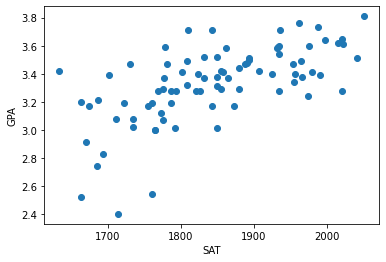

In [64]:
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

In [67]:
gpa_predict = b0+b1*1500

In [68]:
gpa_predict

2.7516848359990345

In [74]:
gpa_predict = b0+b1*1750

In [75]:
gpa_predict

3.170593860721313

In [76]:
gpa_predict = b0+b1*1400

In [77]:
gpa_predict

2.5841212261101227

In [1]:
abs(-1000)

1000

## Project on Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<AxesSubplot:xlabel='area', ylabel='price'>

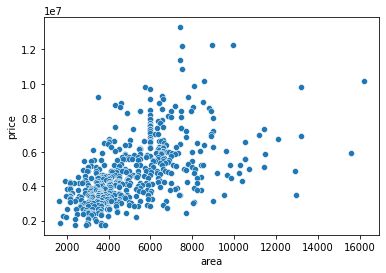

In [8]:
sns.scatterplot(x='area',y='price',data=df)

<AxesSubplot:xlabel='area', ylabel='price'>

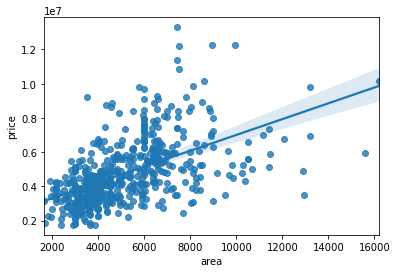

In [9]:
sns.regplot(x='area',y='price',data=df)

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

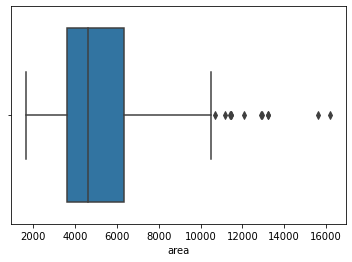

In [10]:
sns.boxplot(df['area'])

<AxesSubplot:xlabel='area', ylabel='Count'>

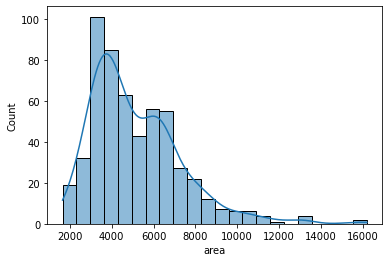

In [12]:
sns.histplot(df['area'],kde=True)

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

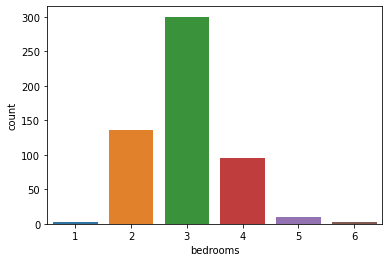

In [13]:
sns.countplot(df['bedrooms'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

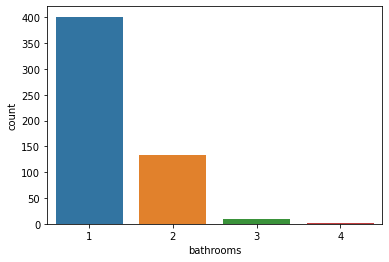

In [14]:
sns.countplot(df['bathrooms'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stories', ylabel='count'>

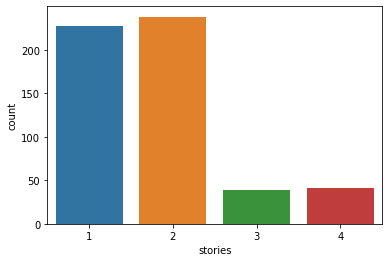

In [15]:
sns.countplot(df['stories'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mainroad', ylabel='count'>

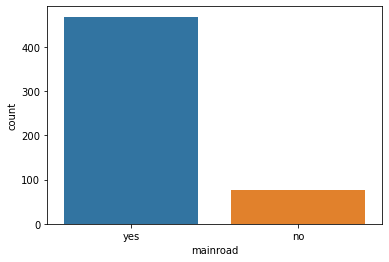

In [16]:
sns.countplot(df['mainroad'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='guestroom', ylabel='count'>

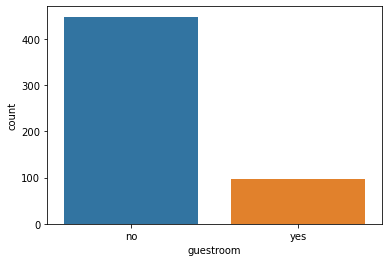

In [17]:
sns.countplot(df['guestroom'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airconditioning', ylabel='count'>

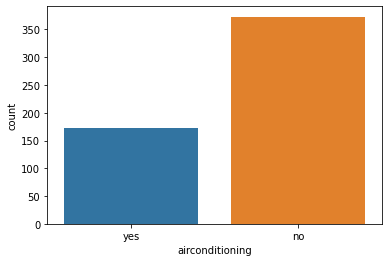

In [18]:
sns.countplot(df['airconditioning'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parking', ylabel='count'>

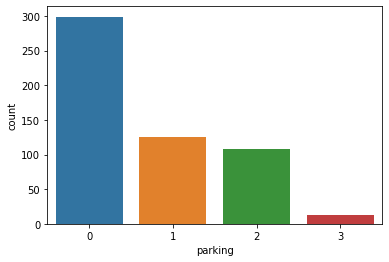

In [19]:
sns.countplot(df['parking'])

In [21]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Feature Engineering

In [22]:
input_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

In [23]:
target = 'price'

In [24]:
input_df = df[input_cols].copy()

In [25]:
input_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [29]:
cat_cols = input_df[input_cols].select_dtypes(include='object').columns.to_list()

In [30]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [33]:
type(encoder)

sklearn.preprocessing._encoders.OneHotEncoder

In [34]:
encoder.fit(input_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [35]:
encoder_cols = list(encoder.get_feature_names(cat_cols))

In [36]:
encoder_cols

['mainroad_no',
 'mainroad_yes',
 'guestroom_no',
 'guestroom_yes',
 'basement_no',
 'basement_yes',
 'hotwaterheating_no',
 'hotwaterheating_yes',
 'airconditioning_no',
 'airconditioning_yes',
 'prefarea_no',
 'prefarea_yes',
 'furnishingstatus_furnished',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [38]:
input_df[encoder_cols] = encoder.transform(input_df[cat_cols])

In [39]:
input_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,yes,no,no,no,yes,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,yes,no,no,no,yes,3,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,yes,no,yes,no,no,2,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,yes,no,yes,no,yes,3,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,yes,yes,yes,no,yes,2,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,no,no,no,no,no,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,yes,no,no,no,no,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,no,no,no,no,no,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
